In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import xlsxwriter
import scipy.ndimage
import xlwt
from xlutils.copy import copy
import xlrd
import openpyxl

In [2]:
with open('tumorbudclassifier_pred_e40_0.01_0.01.txt', 'r') as f:

    a = f.read().splitlines()

a = list(map(int, a))

col = 600   #whole image / roi
row = 600   
p = 20    #roi / patch


b = np.array(a, dtype=np.int)


w = np.zeros((row,col))


for i in range(int(row/p)):

    for j in range(int(col/p)):

        c = b[(i*row*p+j*p*p):(i*row*p+j*p*p)+p*p]

        c = np.reshape(c, (p, p))

        w[i*p:i*p+p, j*p:j*p+p] = c

In [3]:
workbook = xlsxwriter.Workbook('tumorbudclassifier_more_pred_e40_0.01_0.01_sn_3_0.95g_0.8t.xlsx')
worksheet = workbook.add_worksheet('Sheet1')

for (row, col), data in np.ndenumerate(w):
    if data == 3:
        worksheet.write(row, col, 1)
    else:
        worksheet.write(row, col, data)
    
workbook.close()

In [4]:
with open('coarseclassifier_4x_sn_3_0.95g_0.8t_pred.txt', 'r') as f:

    x = f.read().splitlines()

x = list(map(int, x))
x = np.array([x])
x = x.reshape(60,60)
x = scipy.ndimage.zoom(x, 10, order=0)  #'Resampled by a factor of 10 with nearest interpolation'


In [5]:
workbook = xlsxwriter.Workbook('coarseclassifier_pred_4x_sn_3_0.95g_0.8t.xlsx')
worksheet = workbook.add_worksheet("Sheet1")

col = 0

for row, data in enumerate(x):
    worksheet.write_row(row, col, data)
    
    
workbook.close()

In [6]:
def main():

    book = openpyxl.load_workbook('tumorbudclassifier_more_pred_e40_0.01_0.01_sn_3_0.95g_0.8t.xlsx')

    sheet = book.get_sheet_by_name('Sheet1')
    
    for (row, col), data in np.ndenumerate(x):
        if data == 0:
            sheet.cell(row=row+1, column=col+1).value = 1
        elif data == 2:
            sheet.cell(row=row+1, column=col+1).value = 8

    book.save('tumorbudclassifier_more_pred_e40_0.01_0.01_sn_3_0.95g_0.8t.xlsx')
    
if __name__ == '__main__':

    main()

C:\Users\chenyusu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """


C:\Users\chenyusu\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


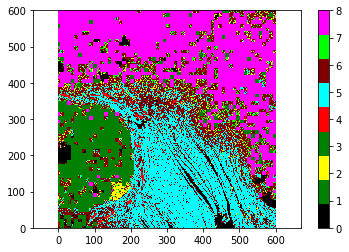

In [7]:
from matplotlib import colors
#pred = output.data.max(1)[1] # get the index of the max log-probability
#pd = pred.numpy()
#pd = np.array([a])
#pdmap = pd.reshape((600, 600))
#pdmap = np.flipud(pdmap)
mapp = pd.read_excel('tumorbudclassifier_more_pred_e40_0.01_0.01_sn_3_0.95g_0.8t.xlsx', sheetname='Sheet1', header=None) #if the first cell is Nan, write 7 to it first
#mapp = mapp.fillna(value=8)
mapp = mapp.values

mapp = np.reshape(mapp,(600, 600))
mapp = np.flipud(mapp)

cmap = colors.ListedColormap([[0,0,0], [0,0.5,0], [1,1,0], [0,0.5,0], [1,0,0], [0,1,1], [0.5,0,0], [0,1,0], [1,0,1]])
map = plt.pcolormesh(mapp, cmap=cmap)
plt.axis('equal')
cbar = plt.colorbar()
cbar.ax.set_ylabel('')

#f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))
#ax_color = ax1.pcolormesh(pdmap, cmap=cmap)
#ax1.axis('equal')

#cbar = ax1.colorbar()
#cbar.ax.set_ylabel('')
#print('Classes: green-Epithelial yellow-Lymphocytes brown-Stroma purple-TumorBuds')
#ax2.imshow(np.transpose((torchvision.utils.make_grid(images, nrow=2)/2 + 0.5).numpy(), (1,2,0)))

#plt.show()
plt.savefig('map_tumorbud_e40_0.01_0.01_sn_3_0.95g_0.8t.png', figsize=(10,10), dpi=1920)